In [89]:
#Bridgette Bryant, Isabelle Kirby
import numpy as np
from tensorflow.keras import utils as np_utils
import os
import pandas as pd
from tqdm import tqdm
from sklearn.utils import shuffle
from skimage.color import rgb2gray
import seaborn as sb
import cv2
from tensorflow.keras import layers, models
import tensorflow as tf  
import matplotlib.pyplot as plt
import pathlib
import imageio
from PIL import Image

In [90]:
class_names = ['class-1', 'class-2', 'class-3' ,'class-4', 'class-5']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [91]:
num = [0,0,0,0,0]
def dataframeTest():
    columnNames = list()
    columnNames.append('label')
    for i in range(784):
        pixel = 'pixel'
        pixel += str(i)
        columnNames.append(pixel)
    output = pd.DataFrame(columns = columnNames)
    folders = '../input/preprocessed-snake-images/preprocessed-cleaned-set/train'

    i = 0
    j = 0
    for folder in os.listdir(folders):
        for file in tqdm(os.listdir(os.path.join(folders,folder))):
            imagepath = os.path.join(os.path.join(folders,folder), file)
            image = Image.open(imagepath)
            image = image.convert("L")
            rimage = image.load()
        
            label = class_names_label[folder]
        
            data=[]
        
            for y in range(28):
                for x in range(28):
                    data.append(rimage[x,y])
                    
            data.append(label)
            
            k = 0
            output.loc[i] = [data[k] for k in range(785)]
            i = i+1

            num[j] += 1
        j += 1
    return output         

In [92]:
data = pd.DataFrame()
data = dataframeTest()

100%|██████████| 3547/3547 [08:19<00:00,  7.10it/s]


In [93]:
print(data.shape)

(17389, 785)


In [94]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


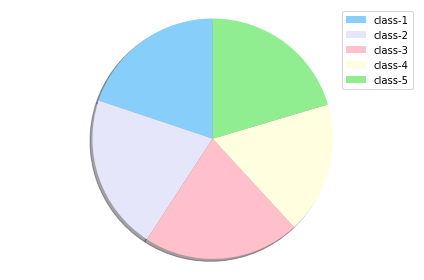

In [95]:
labels = class_names
sizes = num
colors = ['lightskyblue', 'lavender', 'pink', 'lightyellow', 'lightgreen']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Split the data into the testing and training set.

In [96]:
from sklearn.model_selection import train_test_split
x =data.iloc[:, 0:783]
y =data.iloc[:, 784]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
xtrain = xtrain.astype(np.float32)
ytrain = ytrain.astype(np.float32)
xtest = xtest.astype(np.float32)
ytest = ytest.astype(np.float32)

Sequential Model

In [97]:
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [98]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [99]:
history = model.fit(xtrain, ytrain, batch_size=100, epochs=20, validation_split = 0.2)

Epoch 1/20
112/112 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2135 - val_loss: 0.0000e+00 - val_accuracy: 0.2095
Epoch 2/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2129 - val_loss: 0.0000e+00 - val_accuracy: 0.2095
Epoch 3/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2129 - val_loss: 0.0000e+00 - val_accuracy: 0.2095
Epoch 4/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2129 - val_loss: 0.0000e+00 - val_accuracy: 0.2095
Epoch 5/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2129 - val_loss: 0.0000e+00 - val_accuracy: 0.2095
Epoch 6/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2129 - val_loss: 0.0000e+00 - val_accuracy: 0.2095
Epoch 7/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2

In [100]:
score = model.evaluate(xtrain, ytrain, batch_size=100, verbose=1)
print('Accuracy: ', score[1])

140/140 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2122
Accuracy:  0.212206169962883


RNN

In [101]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [102]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
history = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
348/348 [==============================] - 76s 216ms/step - loss: -10.3276 - accuracy: 0.2129 - val_loss: -16.7414 - val_accuracy: 0.2095
Epoch 2/20
348/348 [==============================] - 75s 215ms/step - loss: -22.6223 - accuracy: 0.2129 - val_loss: -28.4834 - val_accuracy: 0.2095
Epoch 3/20
348/348 [==============================] - 73s 211ms/step - loss: -34.3016 - accuracy: 0.2129 - val_loss: -40.1420 - val_accuracy: 0.2095
Epoch 4/20
348/348 [==============================] - 73s 209ms/step - loss: -46.0078 - accuracy: 0.2129 - val_loss: -51.9013 - val_accuracy: 0.2095
Epoch 5/20
348/348 [==============================] - 73s 210ms/step - loss: -57.6954 - accuracy: 0.2129 - val_loss: -63.5717 - val_accuracy: 0.2095
Epoch 6/20
348/348 [==============================] - 73s 209ms/step - loss: -69.3448 - accuracy: 0.2129 - val_loss: -75.2428 - val_accuracy: 0.2095
Epoch 7/20
348/348 [==============================] - 73s 209ms/step - loss: -81.0535 - accuracy: 0.2129 -

In [105]:
pred = model.predict(xtest)
pred_labels = [1 if p>0.5 else 0 for p in pred]

from sklearn.metrics import confusion_matrix, classification_report
print("\nResults on testing data:\n")
print("Confusion Matrix")
print(confusion_matrix(ytest, pred_labels))
print("Classification Report:")
print(classification_report(ytest, pred_labels))


Results on testing data:

Confusion Matrix
[[  0 622   0   0   0]
 [  0 709   0   0   0]
 [  0 714   0   0   0]
 [  0 696   0   0   0]
 [  0 737   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       622
         1.0       0.20      1.00      0.34       709
         2.0       0.00      0.00      0.00       714
         3.0       0.00      0.00      0.00       696
         4.0       0.00      0.00      0.00       737

    accuracy                           0.20      3478
   macro avg       0.04      0.20      0.07      3478
weighted avg       0.04      0.20      0.07      3478



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Transfer Learning. We followed the link given to us by Professor Mazidi. Unfortunately we get an error ther implies that kaggle cannot download the file needed by the Transfer learning from https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5


This is the error given:

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5: None -- [Errno -3] Temporary failure in name resolution


In [106]:
train = pd.DataFrame()
test = pd.DataFrame()
validation = pd.DataFrame()

train, validation = train_test_split(data, test_size=0.5, random_state=1234)
train, test = train_test_split(data, test_size=0.2, random_state=1234)

train = tf.data.Dataset.from_tensor_slices(train.to_dict(orient="list"))
validation = tf.data.Dataset.from_tensor_slices(validation.to_dict(orient="list"))
test = tf.data.Dataset.from_tensor_slices(test.to_dict(orient="list"))

In [107]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.prefetch(buffer_size=AUTOTUNE)
validation = validation.prefetch(buffer_size=AUTOTUNE)
test = test.prefetch(buffer_size=AUTOTUNE)

In [108]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [109]:
IMG_SHAPE = IMAGE_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
base_model.trainable = False
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

In [ ]:
len(model.trainable_variables)

initial_epochs = 10
loss0, accuracy0 = model.evaluate(validation)

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

In [ ]:
history = model.fit(train, epochs=initial_epochs, validation_data=validation)